In [2]:
import sys
import snap
import itertools
from IPython.display import Image, display

print("Hello World")


Hello World


In [25]:
def get_nodes_and_edges(my_graph):
    n_nodes = my_graph.GetNodes()
    n_edges = my_graph.GetEdges()
    print(f"The graph has {n_nodes:,d} nodes, {n_edges:,d} edges.")

def show_g(graph, case_name, print_info=True):
    case_txt = case_name+".txt"
    case_png = case_name+".png"
    snap.DrawGViz(graph, snap.gvlDot, case_png, case_name)
    if print_info:
        get_nodes_and_edges(graph)
    return Image(case_png)

## Testing Zone

In [26]:
# create a directed random graph on X nodes and Y edges
g_er_random = snap.GenRndGnm(snap.PUNGraph, 5, 8)


In [68]:
# traverse the edges
for EI in g_er_random.Edges():
    print("edge (%d, %d)" % (EI.GetSrcNId(), EI.GetDstNId()))

snap.SaveEdgeList(g_er_random, "test_er_random.txt", "Save as tab-separated list of edges")

edge (0, 1)
edge (0, 2)
edge (0, 3)
edge (0, 4)
edge (1, 2)
edge (2, 3)
edge (2, 4)
edge (3, 4)


The graph has 5 nodes, 8 edges.


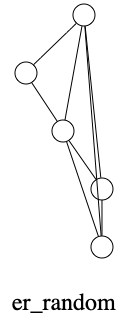

In [27]:
show_g(g_er_random, "er_random")

In [117]:
## https://snap.stanford.edu/snappy/doc/reference/GenSmallWorld.html?highlight=smallworld#GenSmallWorld
Rnd = snap.TRnd(1,0)
g_sw_random = snap.GenSmallWorld(7, 1, 0, Rnd)

The graph has 7 nodes, 7 edges.


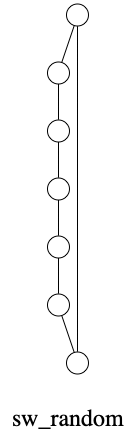

In [118]:
show_g(g_sw_random, "sw_random")

In [128]:
# import numpy as np
# random_pair = np.random.randint(low=0, high=5, size=2)
# print(random_pair)

# random_pair = np.random.choice(6, 2,replace=False) 
# print(random_pair)

In [288]:
import numpy as np

def return_random_edge_pair_set(num_of_node, num_of_rand_edge_pair, show_added=False):
    count = 0
    edge_pair_set = set()
    random_edge_pair_set = set()
    last_few_pair_set = set()

    for i in range(num_of_node):
        # print(i)
        edge_pair_set.add((i, (i+1)%num_of_node))
        edge_pair_set.add((i, (i+2)%num_of_node))
    # print(edge_pair_set)

    last_few_pair_set.add((0, num_of_node-2))
    last_few_pair_set.add((0, num_of_node-1))
    last_few_pair_set.add((1, num_of_node-1))
    last_few_pair_set.add((1, 0))

    while count < num_of_rand_edge_pair:
        ## add these last two edge pairs

        rand_pair = np.random.choice(num_of_node, 2,replace=False) 
        # print(rand_pair)
        if  (rand_pair[0] < rand_pair[1])\
        and (rand_pair[0], rand_pair[1]) not in edge_pair_set\
        and (rand_pair[0], rand_pair[1]) not in last_few_pair_set\
        and (rand_pair[0], rand_pair[1]) not in random_edge_pair_set:
            random_edge_pair_set.add((rand_pair[0], rand_pair[1]))
            count += 1
            # print(count)
    if show_added:
        print(random_edge_pair_set)
    return edge_pair_set, random_edge_pair_set



In [182]:
# add_edge_pairs = return_random_edge_pair_set(7, 2)
# for curr_edge in add_edge_pairs:
#     g_sw_random.AddEdge(int(curr_edge[0]), int(curr_edge[1]))
# show_g(g_sw_random, "sw_random_mod")

### Small World Graph

In [293]:
def make_sw_graph(num_of_node, num_of_rand_edge_pair, show_added=False):

    g_sw_random = snap.TUNGraph.New()
    edge_pair_set, random_edge_pair_set = return_random_edge_pair_set(num_of_node, num_of_rand_edge_pair, show_added)

    for i in range(num_of_node):
        g_sw_random.AddNode(i)
    for curr_edge in edge_pair_set:
        g_sw_random.AddEdge(int(curr_edge[0]), int(curr_edge[1]))
    for curr_edge in random_edge_pair_set:
        g_sw_random.AddEdge(int(curr_edge[0]), int(curr_edge[1]))
    return g_sw_random 


{(0, 3), (2, 5)}
The graph has 6 nodes, 14 edges.


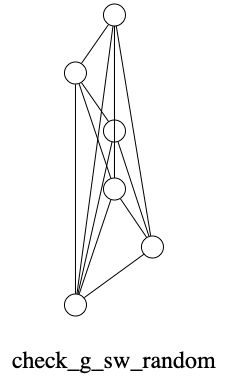

In [294]:
num_of_node = 6
num_of_rand_edge_pair = 2
g_sw_random = make_sw_graph(num_of_node, num_of_rand_edge_pair, show_added=True)
show_g(g_sw_random, "check_g_sw_random")

In [239]:
case_name = "ca-GrQc"
case_txt = case_name+".txt"
g_real_world = snap.LoadEdgeList(snap.PNGraph, case_txt, 0, 1)

In [138]:
print("Original graph profile")
get_nodes_and_edges(g_real_world)

## https://snap.stanford.edu/snappy/doc/reference/DelSelfEdges.html?highlight=self
snap.DelSelfEdges(g_real_world)

print("Remove self-edge")
get_nodes_and_edges(g_real_world)

## https://snap.stanford.edu/snappy/doc/reference/ConvertGraph.html?highlight=undirect

# convert directed graph to undirected
g_real_world_un = snap.ConvertGraph(snap.PUNGraph, g_real_world)

print("Convert directed to undirected")
get_nodes_and_edges(g_real_world_un)


Original graph profile
The graph has 5,242 nodes, 28,980 edges.
Remove self-edge
The graph has 5,242 nodes, 28,968 edges.
Convert directed to undirected
The graph has 5,242 nodes, 14,484 edges.


In [148]:
def get_xy(graph_in):
    # vector of pairs of integers (size, count)
    CntV = snap.TIntPrV()
    # get degree distribution pairs (degree, count)
    snap.GetDegCnt(graph_in, CntV)

    ## Note:
    ## pair (x, y):  
    ## y is the number of nodes in the network 
    ## with degree equal to x.

    pair_list = []
    for item in CntV:
        if item.GetVal1() > 0:
            pair_list.append((item.GetVal1(), item.GetVal2()))
    
    x_data = [i[0] for i in pair_list]

    summation = sum(n for _, n in pair_list)
    y_data = [i[1]/summation for i in pair_list]
    return x_data, y_data

In [154]:
# x_collabNet, y_collabNet = get_xy(g_real_world_un)


In [295]:
# n = 5, e = 8
n=5242
e=14484
g_er_random = snap.GenRndGnm(snap.PUNGraph, n, e)

num_of_node = n
num_of_rand_edge_pair = 4000
g_sw_random = make_sw_graph(num_of_node, num_of_rand_edge_pair, show_added=False)

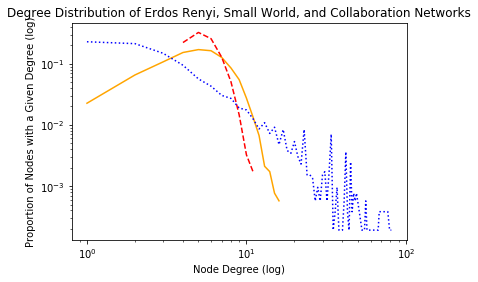

In [296]:
import matplotlib.pyplot as plt

x_erdosRenyi, y_erdosRenyi = get_xy(g_er_random)
plt.loglog(x_erdosRenyi, y_erdosRenyi, color = 'orange', label = 'Erdos Renyi Network')

x_smallWorld, y_smallWorld = get_xy(g_sw_random)
plt.loglog(x_smallWorld, y_smallWorld, linestyle = 'dashed', color = 'r', label = 'Small World Network')

x_collabNet, y_collabNet = get_xy(g_real_world_un)
plt.loglog(x_collabNet, y_collabNet, linestyle = 'dotted', color = 'b', label = 'Collaboration Network')

plt.xlabel('Node Degree (log)')
plt.ylabel('Proportion of Nodes with a Given Degree (log)')
plt.title('Degree Distribution of Erdos Renyi, Small World, and Collaboration Networks')
# plt.legend()
plt.show()

> One to two sentences description of a difference between the collaboration network’s degree distribution and the degree distributions from the random graph models.

1. collaboration network’s degree distribution: gradually decrease in degree distribution plot and with noticeable fluctuation at large node degree
1. For random graph models, the largest proportion of nodes doesn't happen at lowest node degree. Moreover, comparing to collaboration network, the fluctuation is small.

In [300]:
GraphClustCoeff = snap.GetClustCf (g_er_random, -1)
print("Clustering coefficient: %f" % GraphClustCoeff)

GraphClustCoeff = snap.GetClustCf (g_sw_random, -1)
print("Clustering coefficient: %f" % GraphClustCoeff)

GraphClustCoeff = snap.GetClustCf (g_real_world_un, -1)
print("Clustering coefficient: %f" % GraphClustCoeff)


Clustering coefficient: 0.001120
Clustering coefficient: 0.284971
Clustering coefficient: 0.529636
